Import Library

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix,classification_report
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

<a id='4'></a>
# Load Image Path 

In [2]:
data_path="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/"

data_images=[]
data_labels=[]
for i in os.listdir(data_path):
    full_path=os.path.join(data_path+i)
    if(os.path.isdir(full_path)):
        for rice_image in os.listdir(full_path):
            data_images.append(full_path+"/"+rice_image)
            data_labels.append(i)


<a id='5'></a>
# Create DataFrame

In [3]:
df=pd.DataFrame({"label":data_labels,"image":data_images})
df.head(1)

,label,image
0,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   75000 non-null  object
 1   image   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [5]:
df.nunique()

label        5
image    75000
dtype: int64

In [6]:
df_num=df.value_counts(subset="label").reset_index()
df_num

,label,count
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


<a id='6'></a>
# Dataset Visualization

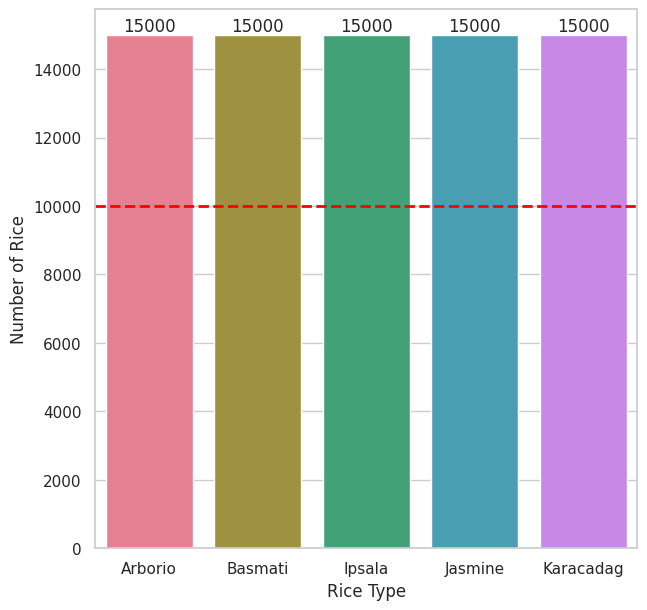

In [7]:
plt.figure(figsize=(7,7))

sns.set_theme(style="whitegrid")

ax=sns.barplot(data=df_num, x="label",y="count",palette="husl",saturation=0.75)
plt.axhline(y=10000, color='red', linestyle='--', linewidth=2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
plt.xlabel("Rice Type")
plt.ylabel("Number of Rice")
plt.show()

In [8]:
df_num["label"]

0      Arborio
1      Basmati
2       Ipsala
3      Jasmine
4    Karacadag
Name: label, dtype: object

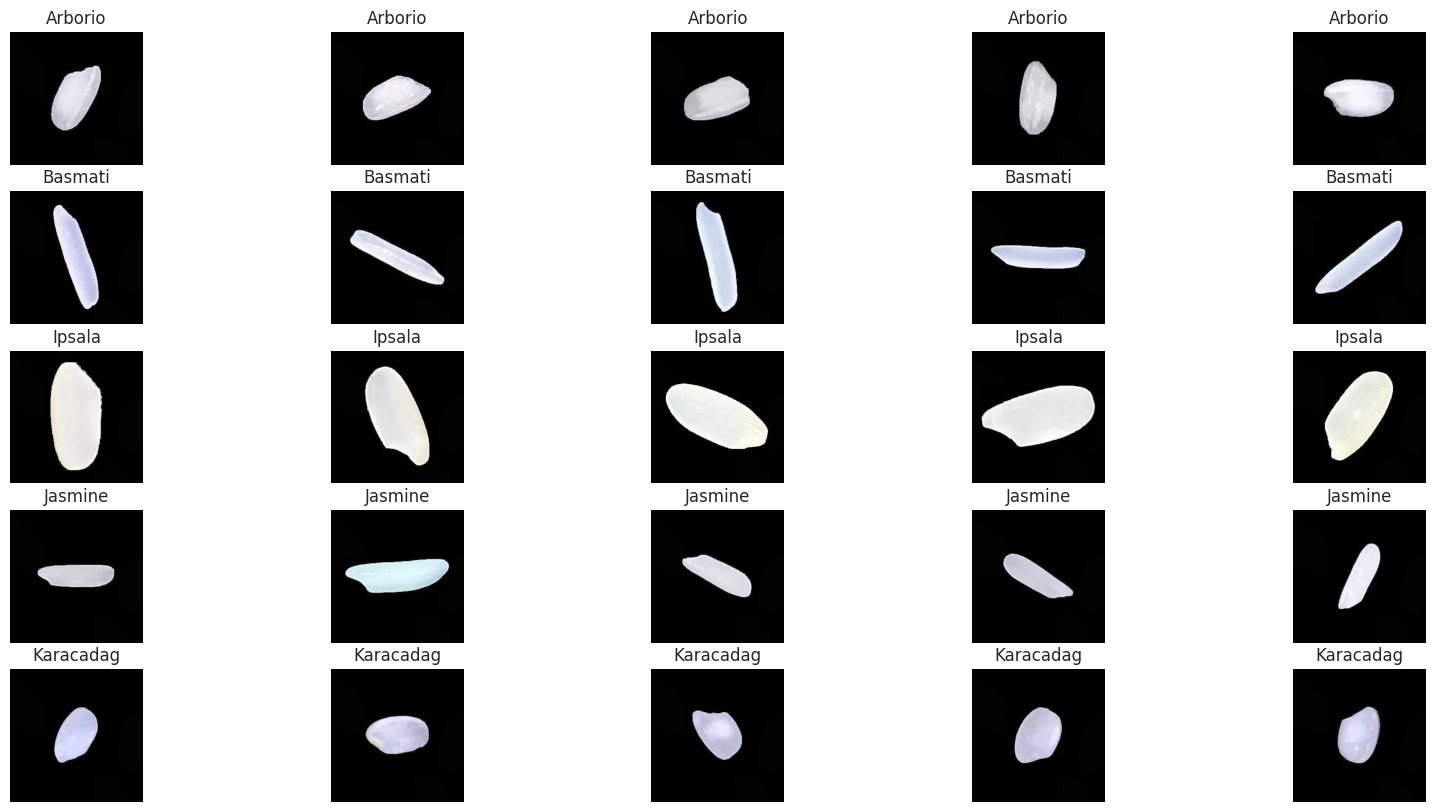

In [9]:
import keras.utils as image
fig=plt.figure(figsize=(20,10))
count=0
for j in range(5):
    for i in range(5):
        ax=fig.add_subplot(5,5,j*5+1+i,xticks=[],yticks=[])

        plt.title(df_num["label"].iloc[j])
        all_files=os.listdir(data_path+df_num["label"].iloc[j])
        plt.axis("off")

        first_image_name=all_files[i]
        ax.imshow(image.load_img(data_path+df_num["label"].iloc[j]+"/"+first_image_name))

plt.show()


In [10]:
df.head()

,label,image
0,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...
1,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...
2,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...
3,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...
4,Karacadag,/kaggle/input/rice-image-dataset/Rice_Image_Da...


<a id='7'></a>
# Train-Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.1, random_state=42)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (67500,)
x_test shape:  (7500,)
y_train shape:  (67500,)
y_test shape:  (7500,)


<a id='8'></a>
# Train-Validation Split

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape: ",y_val.shape)

x_train shape:  (54000,)
x_val shape:  (13500,)
y_train shape:  (54000,)
y_val shape:  (13500,)


In [13]:
df_train= pd.DataFrame({'image': x_train, 'label': y_train})
df_val = pd.DataFrame({'image': x_val, 'label': y_val})
df_test = pd.DataFrame({'image': x_test, 'label': y_test})
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(54000, 2)
(13500, 2)
(7500, 2)


In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [15]:
df_test

,image,label
26837,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
2592,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
18359,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
73292,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
60127,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
...,...,...
36682,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
52710,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio
42507,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
4162,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag


<a id='9'></a>
# Image Augmentation

In [16]:
image_size = (50, 50,3)
batch_size = 32

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
                          rotation_range=25,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True
                        )

val_datagen=ImageDataGenerator(rescale=1./255,
                          rotation_range=25,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True
                          
                        )

train_generator=train_datagen.flow_from_dataframe(df_train,
                                           x_col="image",
                                           y_col="label",
                                           target_size=image_size[:2],
                                           batch_size=batch_size,
                                           class_mode="categorical",
                                           shuffle=True)

val_generator=val_datagen.flow_from_dataframe(df_val,
                                         x_col="image",
                                         y_col="label",
                                         target_size=image_size[:2],
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=False)

test_generator=val_datagen.flow_from_dataframe(df_test,
                                         x_col="image",
                                         y_col="label",
                                         target_size=image_size[:2],
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=False)


Found 54000 validated image filenames belonging to 5 classes.
Found 13500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


In [18]:
numberOfClasses=df_train["label"].value_counts().count()
numberOfClasses

5

<a id='10'></a>
# Create CNN Model

In [19]:
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_size))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(numberOfClasses, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               9

In [24]:
history=model.fit_generator(generator=train_generator,
                           epochs=11,
                           validation_data=val_generator,
                           shuffle=True)

Epoch 1/11
1688/1688 [==============================] - 246s 145ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 2/11
1688/1688 [==============================] - 246s 145ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0197 - val_accuracy: 0.9927
Epoch 3/11
1688/1688 [==============================] - 261s 155ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0212 - val_accuracy: 0.9927
Epoch 4/11
1688/1688 [==============================] - 283s 168ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0163 - val_accuracy: 0.9941
Epoch 5/11
1688/1688 [==============================] - 273s 162ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 6/11
1688/1688 [==============================] - 233s 138ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0206 - val_accuracy: 0.9930
Epoch 7/11
1688/1688 [==============================] - 231s 137ms/step - loss: 0.0220 - accuracy: 0.9932 - val_

<a id='11'></a>

# Visualization of Results

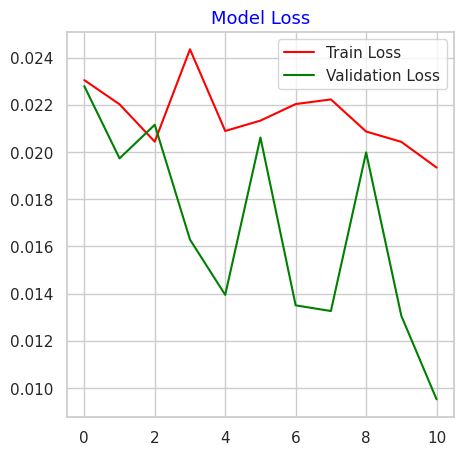

In [25]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],label = "Train Loss", color = "red")
plt.plot(history.history["val_loss"],label = "Validation Loss",color = "green")
plt.title("Model Loss", color = "blue", size = 13)
plt.legend()
plt.show()

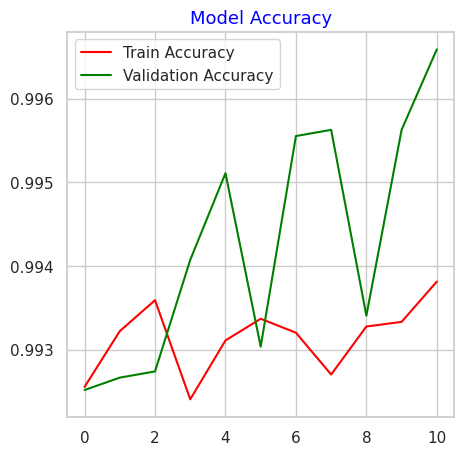

In [26]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "red")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "green")
plt.title("Model Accuracy", color = "blue", size = 13)
plt.legend()
plt.show()

<a id='12'></a>

# Model Accuracy With Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred=model.predict(test_generator)

y_pred_classes=np.argmax(y_pred,axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes))

235/235 [==============================] - 72s 307ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1456
           1       1.00      1.00      1.00      1537
           2       1.00      1.00      1.00      1463
           3       0.99      0.99      0.99      1522
           4       1.00      1.00      1.00      1522

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [28]:
rice_names=df_test["label"].unique()
rice_names

array(['Basmati', 'Karacadag', 'Ipsala', 'Jasmine', 'Arborio'],
      dtype=object)

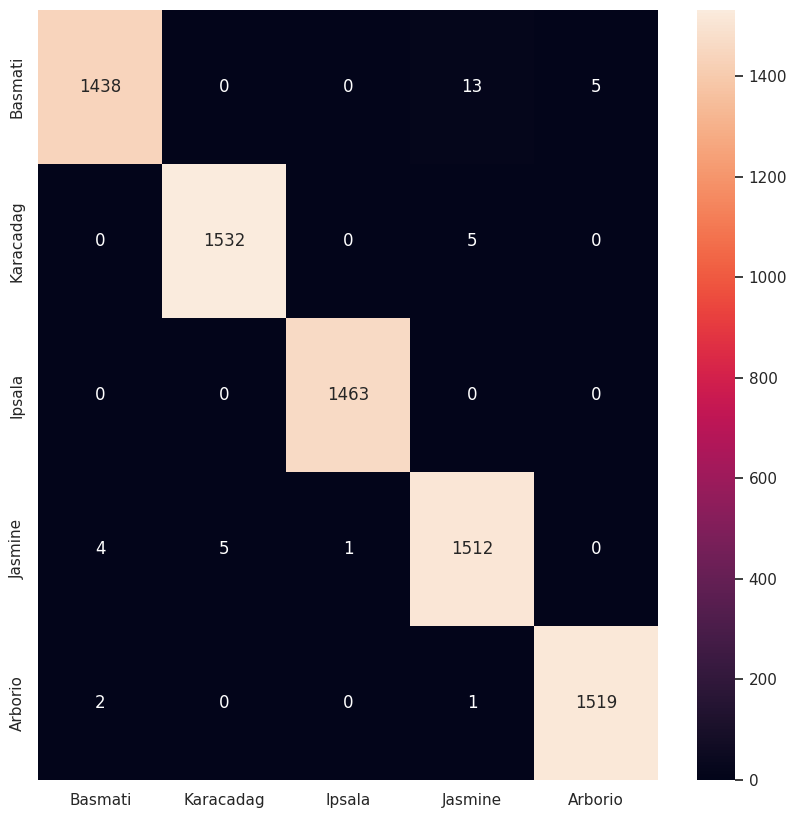

In [29]:
rice_names=df_test["label"].unique()

f,ax=plt.subplots(figsize=(10,10))

sns.heatmap(cm,annot=True,fmt=".0f")

ax.set_xticklabels(rice_names)

ax.set_yticklabels(rice_names)

plt.show()

In [30]:
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

235/235 [==============================] - 21s 88ms/step - loss: 0.0139 - accuracy: 0.9953
Accuracy: 0.9953333139419556
